# Dados do aluno

Jackes Tiago Ferreira da Fonseca - 190030291

# Objetivo

Criar um modelo que faz a distinção entre homem e mulher e implantar um aplicativo web

# Motivação

Conseguir uma maneira simples de hospedar aplicativos de demonstração de ML a fim de criar seu portfólio de ML, exibindo seus projetos em conferências ou para as partes interessadas e trabalhe em colaboração com outras pessoas no ecossistema de ML.

# Modelagem

## Passo 01: Instalando e atualizando dependências 

In [2]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [3]:
!pip install -Uqq duckduckgo_search

In [4]:
!pip install -Uqq fastai

In [5]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep

## Passo 02: Obter dataset

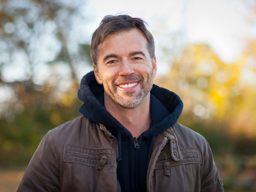

In [36]:
def search_images(term, max_images=400): 
  return L(ddg_images(term, max_results=max_images)).itemgot('image')

download_url(search_images('man photo', max_images=1)[0], 'man.jpg', show_progress=False)
Image.open('man.jpg').to_thumb(256,256)

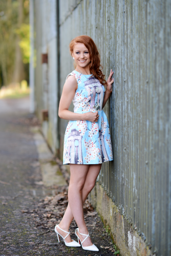

In [37]:
download_url(search_images('woman photo', max_images=1)[0], 'woman.jpg', show_progress=False)
Image.open('woman.jpg').to_thumb(256,256)

In [38]:
searches = 'man','woman'
path = Path('man_or_woman')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [39]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

15

## Passo 03 - Treinar o modelo

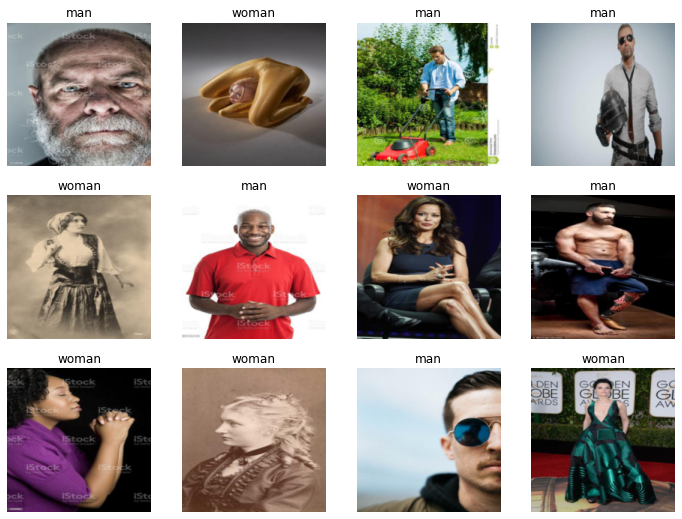

In [40]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=12)

In [41]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.941860,0.342308,0.136546,02:10


epoch,train_loss,valid_loss,error_rate,time
0,0.412045,0.213639,0.072289,03:11
1,0.253210,0.168725,0.048193,03:10
2,0.165726,0.190338,0.052209,03:10
3,0.109947,0.190698,0.048193,03:08
4,0.079541,0.184105,0.044177,03:11
5,0.057308,0.186768,0.044177,03:08


In [43]:
is_man,_,probs = learn.predict(PILImage.create('man.jpg'))
print(f"Isso é um(a): {is_man}.")
print(f"Probabilidade de ser um homem: {probs[0]:.4f}")

Isso é um(a): man.
Probabilidade de ser um homem: 1.0000


# Hospedagem da aplicação

## Exportando o modelo

In [ ]:
Para utilizar o seu modelo treinado, você pode utilizar a função do fastai para exportar seu arquivo

In [44]:
learn.export('model.pkl')

## Fazendo o deploy

Para fazer o deploy será utilizado o [gradio](https://github.com/gradio-app) que é uma biblioteca Python gratuita e de código aberto que permite desenvolver uma demonstração de componente personalizável fácil de usar para seu modelo de aprendizado de máquina que qualquer pessoa pode usar em qualquer lugar



In [46]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━

In [47]:
from fastai.vision.all import *
import gradio as gr

def is_man(x): return x[0].isupper()

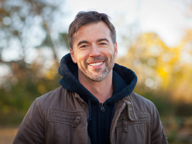

In [49]:
im = PILImage.create('man.jpg')
im.thumbnail((192, 192))
im

In [50]:
learn = load_learner('model.pkl')

In [51]:
learn.predict(im)

('man', TensorBase(0), TensorBase([1.0000e+00, 2.2754e-06]))

In [52]:
categories = ('man', 'woman')

def classify_image(img):
  pred,idx,probs = learn.predict(img)
  return dict(zip(categories, map(float,probs)))

In [53]:
classify_image(im)

{'man': 0.9999977350234985, 'woman': 2.2754336441721534e-06}

In [59]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['man.jpg', 'woman.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://2af2a208b31733d0.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f50557ede10>,
 'http://127.0.0.1:7862/',
 'https://2af2a208b31733d0.gradio.app')

Poderá ser utilizado também o [HuggingFace Space](https://github.com/huggingface) que é uma plataforma online que oferece tais serviços que permite hospedar aplicações de ML diretamente no seu perfil ou no perfil da sua organização

# Conclusão

Por meio da lição 2 foi possível criar e hospedar seu modelo a fim de que possa ser possível compartilhar sua aplicação de maneira pública com outras pessoas de forma gratuida e rápida